In [1]:
# Checkout www.pygimli.org for more examples
%matplotlib inline


# Region markers

**Author:** *Maximilian Weigand, University of Bonn*

A mesh can have different regions, which are defined by region markers for each
cell. Region markers can be used to assign properties for forward modelling as
well as to control the inversion behavior. This tutorial highlights the usage of
regionMarkers, as well as some properties of regions if the
**pygimli.meshtools** package is used to create complex compound meshes.

When constructing complex geometries out of basic geometric shapes (e.g.,
circle, rectangle, ...) we need to be careful with the region markers and their
positions. This example shows how to use markerPositions to properly set region
markers.


In [2]:
import pygimli as pg
import pygimli.meshtools as mt

In this first part we naively combine objects and assign markers to them,
expecting two regions of concentric rings with markers 1 and 2. Note how the
outer ring is assigned the marker 0 in the figure, although we specified
marker=1 for the larger circle? A marker value of 0 is assigned to a region
if no region marker is found, indicating that the marker for the outer ring
was overwritten/ignored by the inner circle, which was added later.



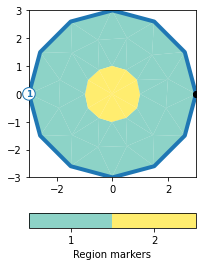

In [3]:
circle_outer = mt.createCircle(pos=[0.0, 0.0], radius=3.0, marker=1)

circle_inner = mt.createCircle(
    pos=[0.0, 0.0],
    radius=1.0,
    # area=.3,
    boundaryMarker=0,
    marker=2)

plc = circle_outer + circle_inner

ax, cb = pg.show(plc, markers=True)

The solution to this problem is the region marker, which defines the marker
value of the region that it is placed in. By default all region markers are
assigned the position (0,0,0), thereby overwriting each other (see black dots
in figure below). If no region marker is present in a region, a marker value
of 0 is assigned.



In [7]:
fig = ax.get_figure()
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())
    ax.scatter(marker.x(), marker.y(), s=(2 - nr) * 30, color='k')
ax.set_title('marker positions - non-working example')
#fig.show()

Position marker number 1: 2.95 0.0 0.0
Position marker number 2: 0.95 0.0 0.0


Text(0.5, 1.0, 'marker positions - non-working example')

Let us fix this issue by assigning region marker positions that are not
overwritten by other objects when the geometries are merged (using the
**markerPosition** parameter):



Position marker number 1: 2.95 0.0 0.0
Position marker number 2: 0.95 0.0 0.0


C:\Users\simold\AppData\Local\Temp\ipykernel_28400\3122277391.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


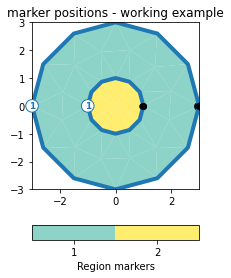

In [6]:
circle_outer = mt.createCircle(
    pos=[0.0, 0.0],
    radius=3.0,
    marker=1,
    markerPosition=[2.95, 0.0],
)

circle_inner = mt.createCircle(
    pos=[0.0, 0.0],
    radius=1.0,
    marker=2,
    markerPosition=[0.95, 0.0],
)

plc = circle_outer + circle_inner

ax, cb = pg.show(plc, markers=True)

fig = ax.get_figure()
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())
    ax.scatter(marker.x(), marker.y(), s=(2 - nr) * 30, color='k')
ax.set_title('marker positions - working example')
fig.show()

The same issue can occur for polygons. Polygons can assume complex forms, but
for simplicity we create cubes here.



In [ ]:
polygon1 = mt.createPolygon(
    [[0.0, 0.0], [1.0, 0.0], [1.0, -1.0], [0.0, -1]],
    isClosed=True,
    marker=1,
)

polygon2 = mt.createPolygon(
    [[0.25, -0.25], [0.75, -0.25], [0.75, -0.75], [0.25, -0.75]],
    isClosed=True,
    marker=2,
)

plc = polygon1 + polygon2

ax, cb = pg.show(plc, markers=True)

fig = ax.get_figure()
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())
    ax.scatter(marker.x(), marker.y(), s=(4 - nr) * 20, color='k')
ax.set_title('marker positions - non-working example')
fig.show()

Again, we can simply fix with the **markerPosition** parameter



In [ ]:
polygon1 = mt.createPolygon(
    [[0.0, 0.0], [1.0, 0.0], [1.0, -1.0], [0.0, -1]],
    isClosed=True,
    marker=1,
    markerPosition=[0.9, -0.9],
)

polygon2 = mt.createPolygon(
    [[0.25, -0.25], [0.75, -0.25], [0.75, -0.75], [0.25, -0.75]],
    isClosed=True,
    marker=2,
)

plc = polygon1 + polygon2

ax, cb = pg.show(plc, markers=True)

fig = ax.get_figure()
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())
    ax.scatter(marker.x(), marker.y(), s=(4 - nr) * 20, color='k')
ax.set_title('marker positions - working example')
fig.show()

And finally, a similar example for rectangles...



In [ ]:
rect1 = mt.createRectangle(
    start=[0.0, 0.0],
    end=[2.0, -1.0],
    isClosed=True,
    marker=1,
)

# move the rectangle by changing the center position
rect2 = mt.createRectangle(
    start=[0.0, 0.0],
    end=[1.0, -0.5],
    isClosed=True,
    marker=2,
)

plc = rect1 + rect2

ax, cb = pg.show(plc, markers=True)

fig = ax.get_figure()
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())
    ax.scatter(marker.x(), marker.y(), s=(4 - nr) * 20, color='k')
ax.set_title('marker positions - non-working example')
fig.show()

For the last time, fixing it...



In [ ]:
rect1 = mt.createRectangle(
    start=[0.0, 0.0],
    end=[2.0, -1.0],
    isClosed=True,
    marker=1,
    markerPosition=[1.75, -0.25],
)

# move the rectangle by changing the center position
rect2 = mt.createRectangle(
    start=[0.0, 0.0],
    end=[1.0, -0.5],
    isClosed=True,
    marker=2,
)

plc = rect1 + rect2

ax, cb = pg.show(plc, markers=True)

fig = ax.get_figure()
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())
    ax.scatter(marker.x(), marker.y(), s=(4 - nr) * 20, color='k')
ax.set_title('marker positions - working example')
fig.show()

<div class="alert alert-info"><h4>Note</h4><p>This tutorial was kindly contributed by Maximilian Weigand (University of
  Bonn). If you also want to contribute an interesting example, check out
  our `contribution guidelines <https://www.pygimli.org/contrib.html>`_.</p></div>

